<a href="https://colab.research.google.com/github/KeshavAman/Water-Potability-Prediction-Using-Machine-Learning/blob/main/Water%20Potability%20Model%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing the Dataset**

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/Water-Potability-Prediction-Using-Machine-Learning/main/water_potability.csv')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
dataset.shape

(3276, 10)

**Dropping null values**

In [4]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
dataset = dataset.dropna(axis = 1)
dataset.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0


In [6]:
dataset.shape

(3276, 7)

**Get the count**

In [8]:
dataset['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

**Visualize the count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


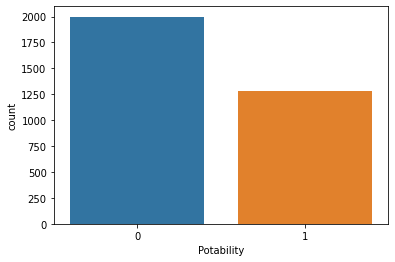

In [9]:
sns.countplot(dataset['Potability'], label = 'count')

**Look at datatype of dataset**

In [10]:
dataset.dtypes

Hardness          float64
Solids            float64
Chloramines       float64
Conductivity      float64
Organic_carbon    float64
Turbidity         float64
Potability          int64
dtype: object

**Pairplot**

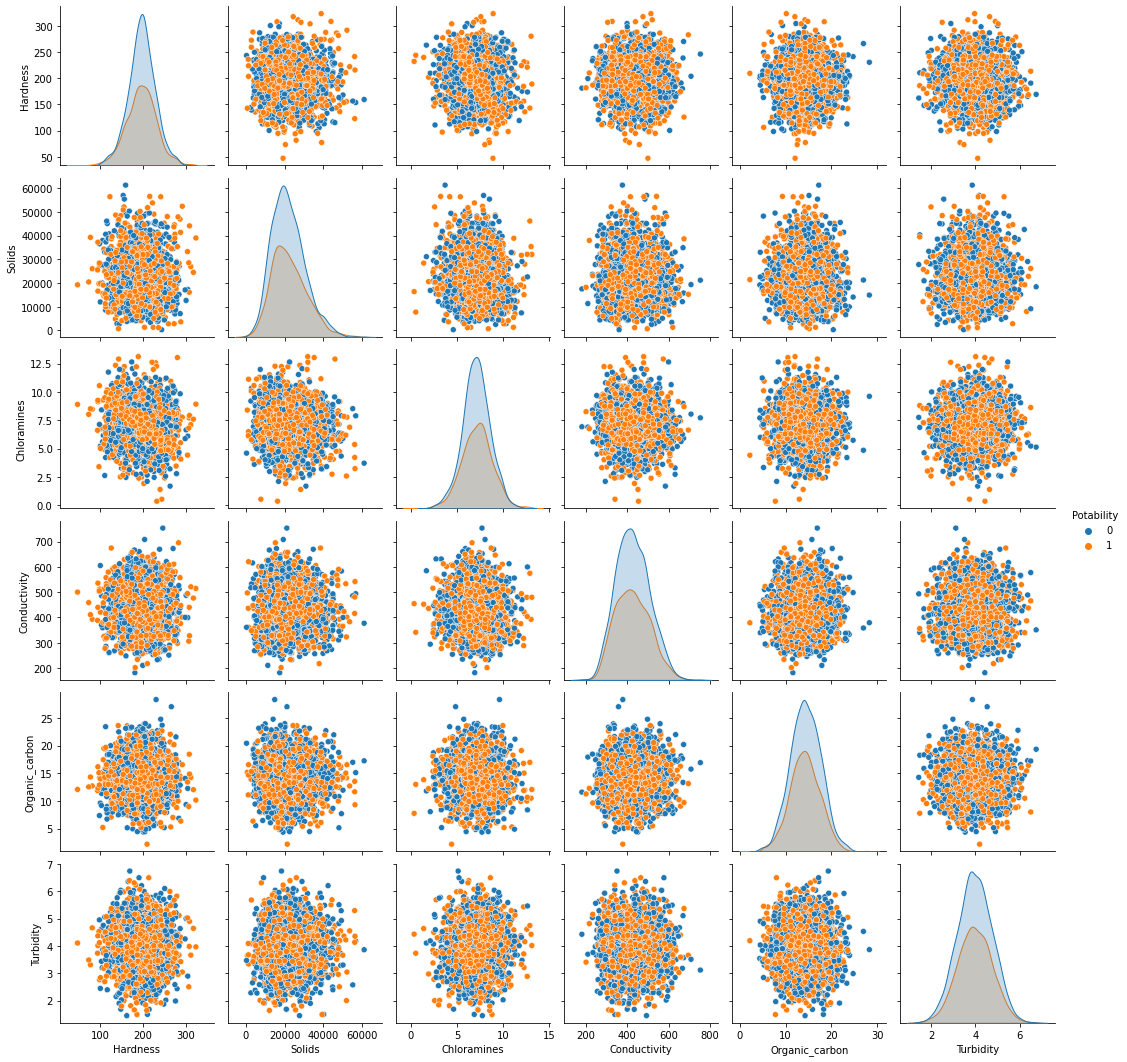

In [11]:
sns.pairplot(dataset, hue = 'Potability')

**Displot in comparision to Hardness and Potability**

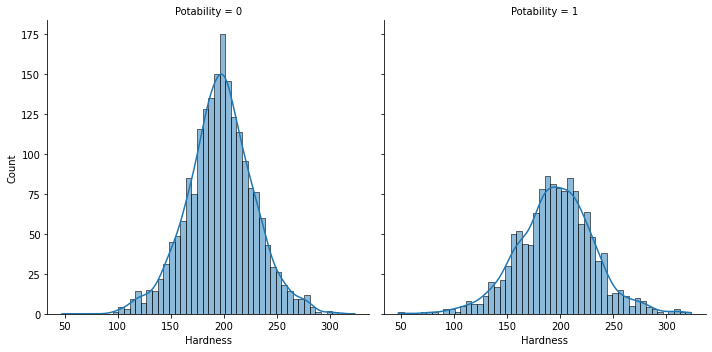

In [12]:
sns.displot(dataset, x = 'Hardness', col = 'Potability', kde = True)

**Heatmap**

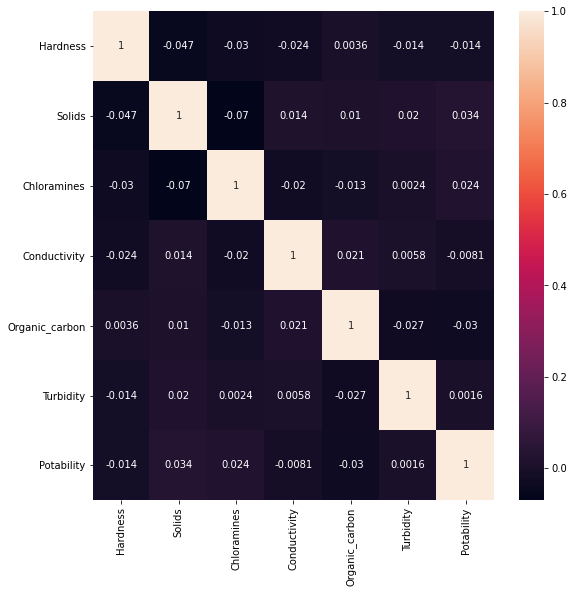

In [13]:
plt.figure(figsize = (9,9))
sns.heatmap(dataset.corr(), annot = True)

**Categorical data values**

In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(dataset.iloc[:,1].values)
dataset.iloc[:,1] = labelencoder_Y.fit_transform(dataset.iloc[:,1].values)
dataset.iloc[:,1]

0       1619
1       1283
2       1466
3       1794
4       1175
        ... 
3271    3249
3272    1068
3273    2917
3274     354
3275    1079
Name: Solids, Length: 3276, dtype: int64

**Splitting and Scaling of dataset**

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,2:7].values
Y = dataset.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split( X, Y ,test_size = 0.20, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Dimensions of dataset**

In [17]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape : ",Y_train.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (2620, 5)
X_test shape :  (656, 5)
Y_train shape :  (2620,)
Y_test shape :  (656,)


**Using Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 40)
logreg.fit(X_train, Y_train)
accuracy_logreg = logreg.score(X_train, Y_train)

**Using KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski' , p=2)
knn_model.fit(X_train , Y_train)
accuracy_knn = knn_model.score(X_train , Y_train)

**Using Support Vector Classifier**

In [20]:
from sklearn.svm import SVC

svm_model = SVC( kernel = 'linear',random_state = 42)
svm_model.fit(X_train , Y_train)
accuracy_svm = svm_model.score(X_train , Y_train)

**Using Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train , Y_train)
accuracy_nb = nb_model.score(X_train , Y_train)

**Using Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier( criterion = 'entropy' , random_state = 1)
dt_model.fit(X_train , Y_train)
accuracy_dt = dt_model.score(X_train , Y_train)

**Using Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 6 ,criterion = 'entropy' , random_state = 25)
rf_model.fit(X_train , Y_train)
accuracy_rf = rf_model.score(X_train , Y_train)

**Accuracy**

In [24]:
print("Logistic Regression Accuracy : ",accuracy_logreg)
print("KNN Accuracy : ",accuracy_knn)
print("Support Vector Classifier Accuracy : ",accuracy_svm)
print("Naive bayes Accuracy : ",accuracy_nb)
print("Decision Tree Accuracy : ",accuracy_dt)
print("Random Forest Accuracy : ",accuracy_rf)

Logistic Regression Accuracy :  0.08091603053435115
KNN Accuracy :  0.19122137404580153
Support Vector Classifier Accuracy :  1.0
Naive bayes Accuracy :  1.0
Decision Tree Accuracy :  1.0
Random Forest Accuracy :  0.9580152671755725
